In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:/Users/Desktop/Project/dataset.csv')
df.fillna(df.mean(numeric_only=True), inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Desktop/Project/dataset.csv'

In [ ]:
#CBR & CDR

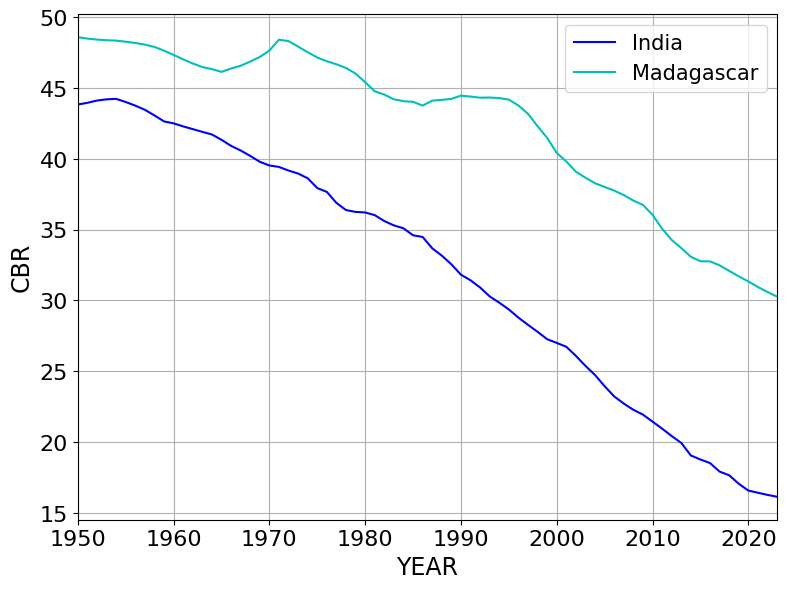

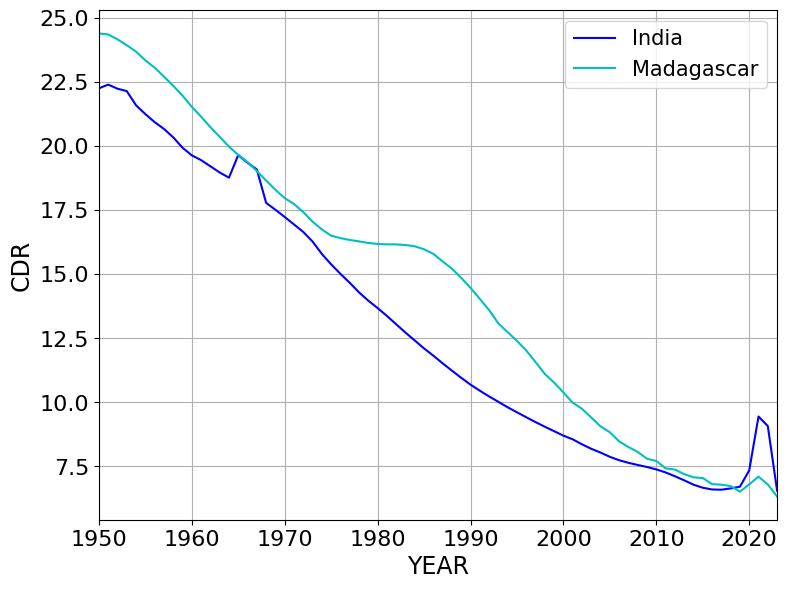

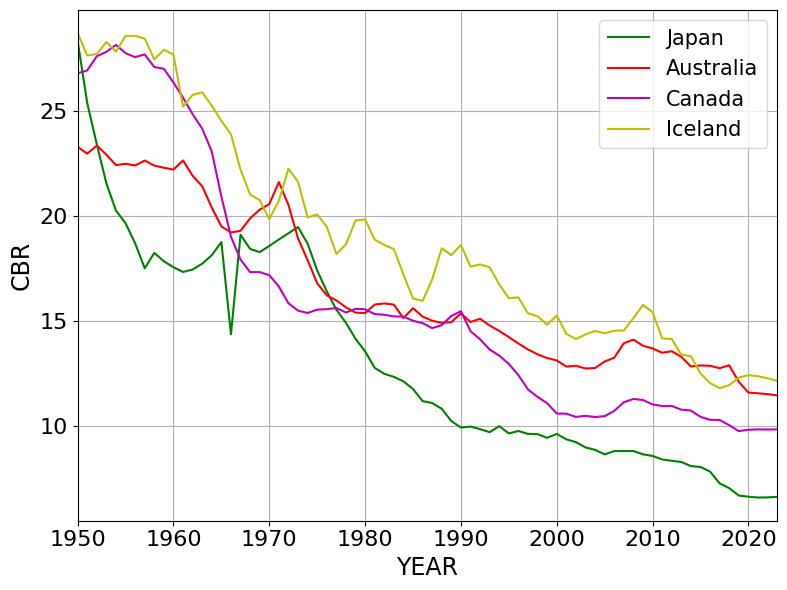

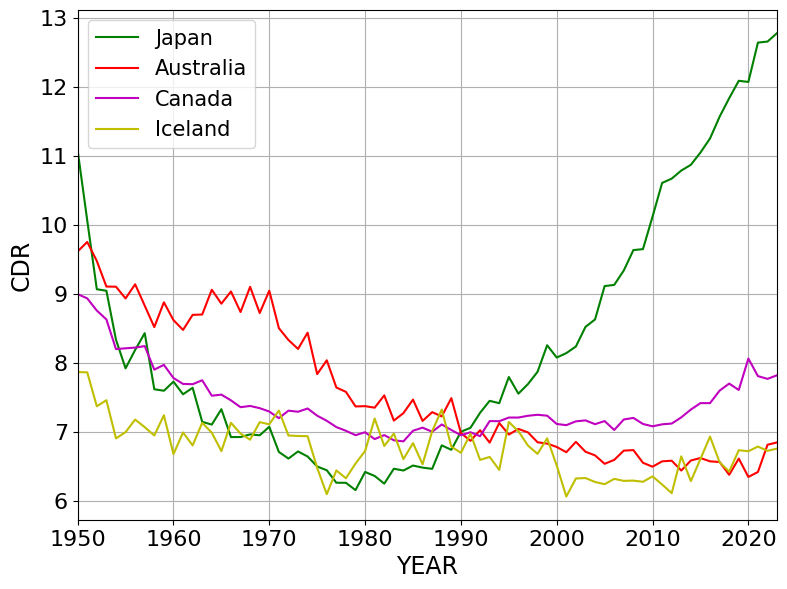

In [12]:
features = ['Location', 'Time', 'CBR', 'CDR']
selected_data = df[features]

selected_countries = ['India', 'Japan', 'Australia', 'Madagascar', 'Canada', 'Iceland']
filtered_data = selected_data[(selected_data['Location'].isin(selected_countries)) & (selected_data['Time'] <= 2023)]

colors = {'India': 'b', 'Japan': 'g', 'Australia': 'r', 'Madagascar': 'c', 'Canada': 'm', 'Iceland': 'y'}

fig, ax = plt.subplots(figsize=(8, 6))

#India & Madagascar
for i, country in enumerate(['India', 'Madagascar']):
    country_data = filtered_data[filtered_data['Location'] == country]
    ax.plot(country_data['Time'], country_data['CBR'], label=country, color=colors[country])

ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('CBR', fontsize=17)
ax.legend()
ax.legend(fontsize='15')
ax.grid(True)
ax.set_xlim(1950, 2023)

plt.xticks(fontsize=16)  
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))

for i, country in enumerate(['India', 'Madagascar']):
    country_data = filtered_data[filtered_data['Location'] == country]
    ax.plot(country_data['Time'], country_data['CDR'], label=country, color=colors[country])

ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('CDR', fontsize=17)
ax.legend()
ax.legend(fontsize='15')

ax.grid(True)
ax.set_xlim(1950, 2023)

plt.xticks(fontsize=16) 
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))

for i, country in enumerate(['Japan', 'Australia', 'Canada', 'Iceland']):
    country_data = filtered_data[filtered_data['Location'] == country]
    ax.plot(country_data['Time'], country_data['CBR'], label=country, color=colors[country])

ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('CBR', fontsize=17)
#ax.set_title('CDR Over Year - Other Countries')
ax.legend()
ax.legend(fontsize='15')

ax.grid(True)
ax.set_xlim(1950, 2023)

plt.xticks(fontsize=16) 
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))

for i, country in enumerate(['Japan', 'Australia', 'Canada', 'Iceland']):
    country_data = filtered_data[filtered_data['Location'] == country]
    ax.plot(country_data['Time'], country_data['CDR'], label=country, color=colors[country])
    

ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('CDR', fontsize=17)
#ax.set_title('CDR Over Year - Other Countries')
ax.legend()
ax.legend(fontsize='15')

ax.grid(True)
ax.set_xlim(1950, 2023)

plt.xticks(fontsize=16)  
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
#Net Migration

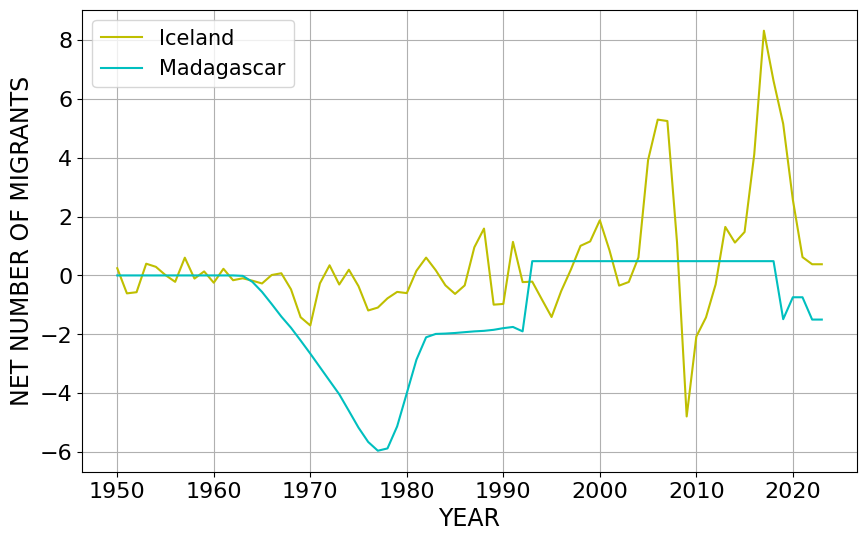

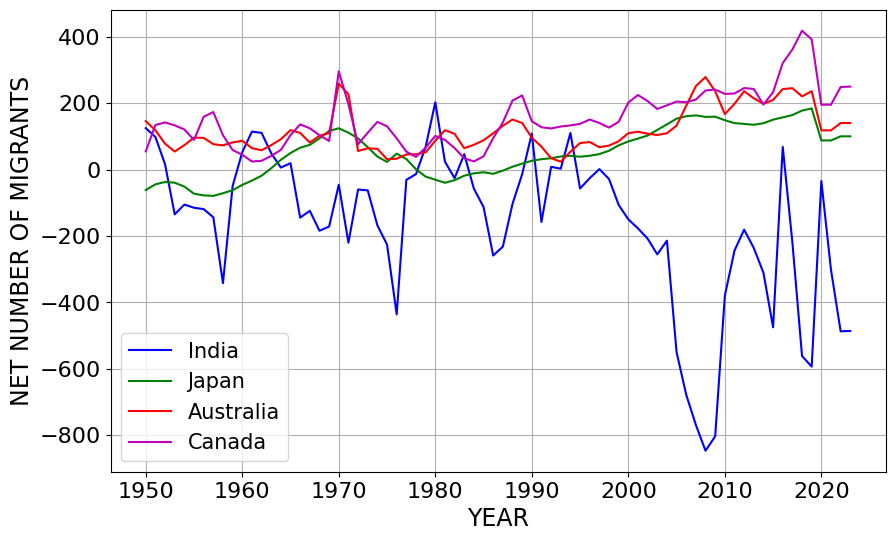

In [13]:
def plot_net_migrations(df, selected_countries):
    features = ['Location', 'Time', 'NetMigrations']
    selected_data = df[features]
    filtered_data = selected_data[(df['Location'].isin(selected_countries)) & (df['Time'] <= 2023)]
    
    colors = {'India': 'b', 'Japan': 'g', 'Australia': 'r', 'Madagascar': 'c', 'Canada': 'm', 'Iceland': 'y'}
    
    plt.figure(figsize=(10, 6))

    for country in selected_countries:
        country_data = filtered_data[filtered_data['Location'] == country]
        plt.plot(country_data['Time'], country_data['NetMigrations'], label=country, color=colors[country])

    #plt.title('Net Migrations Over Time')
    plt.xlabel('YEAR', fontsize=17)
    plt.ylabel('NET NUMBER OF MIGRANTS', fontsize=17)
    plt.legend(fontsize='15')
    plt.grid(True)
    plt.xticks(fontsize=16) 
    plt.yticks(fontsize=16)
    plt.show()

countries1 = ['Iceland', 'Madagascar']
countries2 = ['India', 'Japan', 'Australia', 'Canada']

plot_net_migrations(df, countries1)
plot_net_migrations(df, countries2)


In [ ]:
#Correlation Matrix

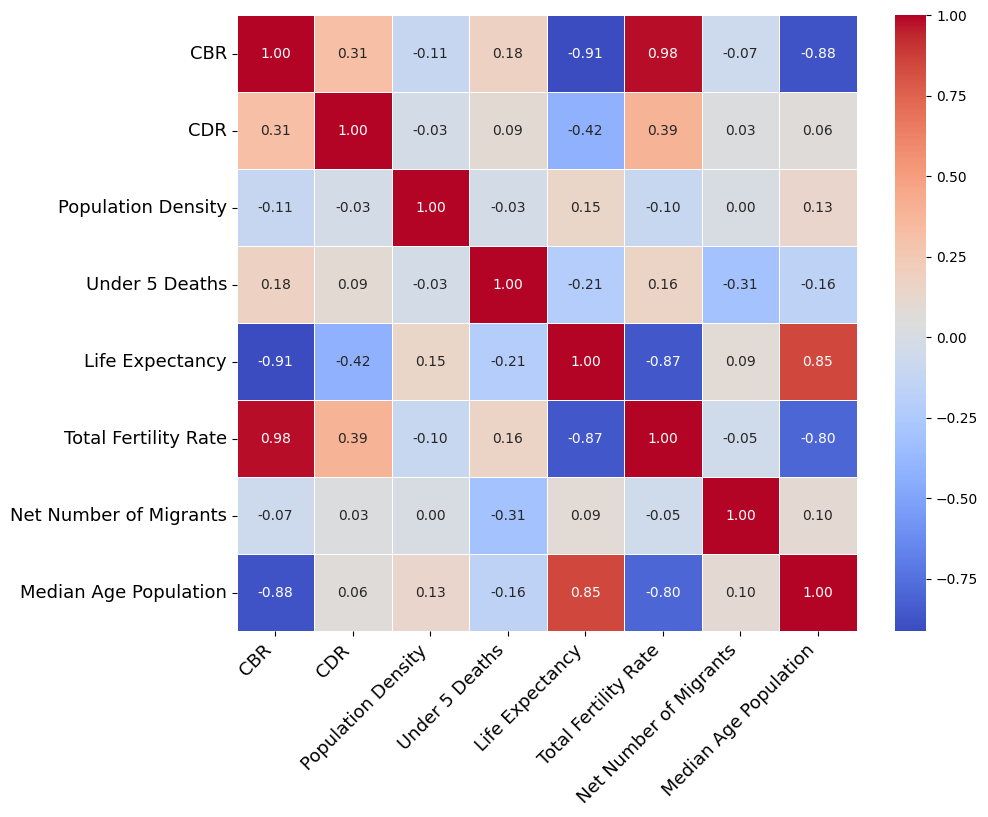

In [14]:
feature_mapping = {
    'PopDensity': 'Population Density',
    'Under5Deaths': 'Under 5 Deaths',
    'LEx': 'Life Expectancy',
    'TFR': 'Total Fertility Rate',
    'NetMigrations': 'Net Number of Migrants',
    'MedianAgePop': 'Median Age Population'
}


df.rename(columns=feature_mapping, inplace=True)

numeric_features = ['CBR', 'CDR', 'Population Density', 'Under 5 Deaths', 'Life Expectancy', 'Total Fertility Rate', 'Net Number of Migrants', 'Median Age Population']

correlation_matrix = df[numeric_features].corr()

font_size = 13

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=font_size)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=font_size)

plt.xticks(rotation=45, ha='right')

#plt.title('Correlation Matrix of Demographic Features', fontsize=font_size)

plt.show()


In [ ]:
#Log of Total Population

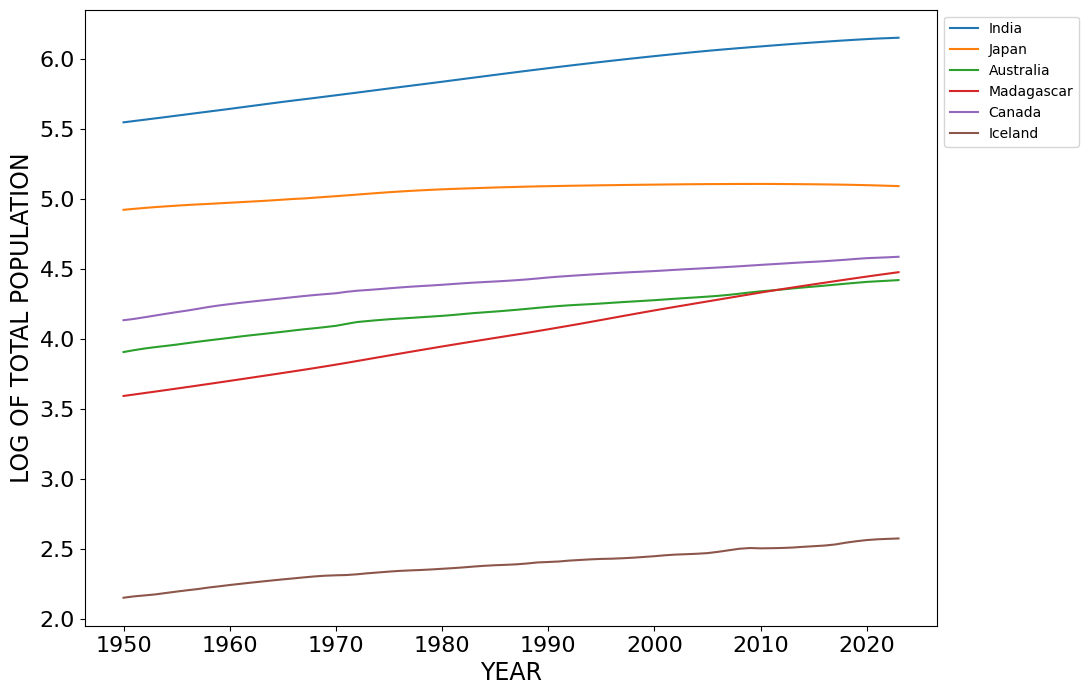

In [15]:
df = df[df['Time'] <= 2023]

selected_countries = ['India', 'Japan', 'Australia', 'Madagascar', 'Canada', 'Iceland']

colors = {'India': 'b', 'Japan': 'g', 'Australia': 'r', 'Madagascar': 'c', 'Canada': 'm', 'Iceland': 'y'}
df_selected = df[df['Location'].isin(selected_countries)]

df_log = df_selected.copy()
df_log['LogPopulation'] = df_log['TPopulation1Jan'].apply(lambda x: 0 if x == 0 else np.log10(x))

plt.figure(figsize=(11, 8))
for country in selected_countries:
    country_data = df_log[df_log['Location'] == country]
    plt.plot(country_data['Time'], country_data['LogPopulation'], label=country)

plt.xticks(fontsize=16) 
plt.yticks(fontsize=16)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

#plt.title('Population Growth Over Year')
plt.xlabel('YEAR', fontsize  =17)
plt.ylabel('LOG OF TOTAL POPULATION', fontsize  =17)
plt.show()
